<a href="https://colab.research.google.com/github/Duddu64/PDI/blob/main/ManualFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

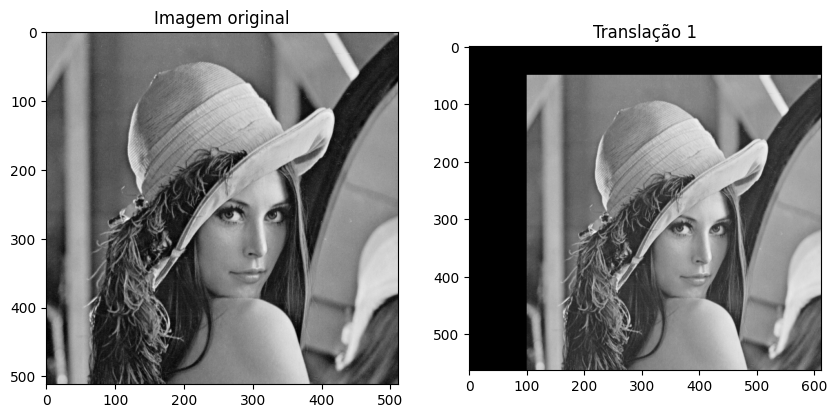

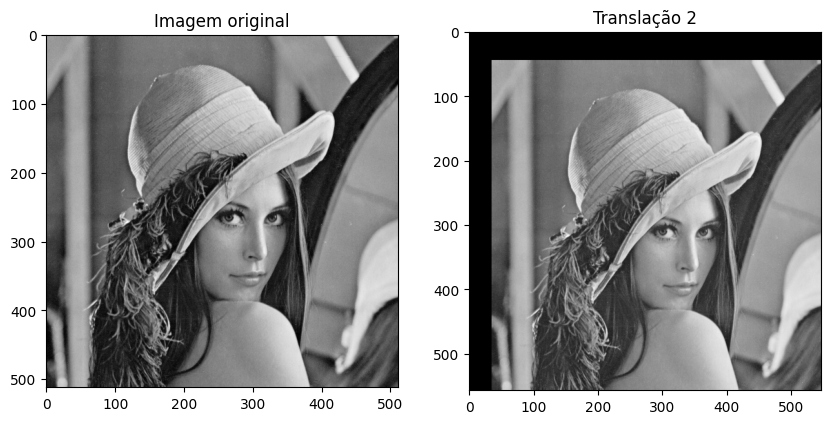

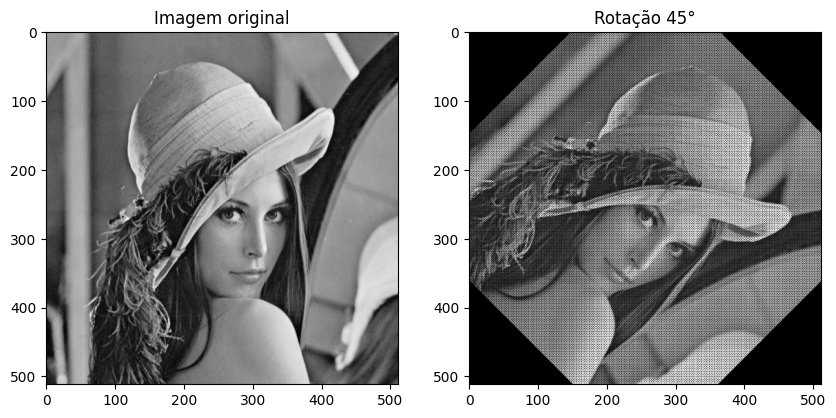

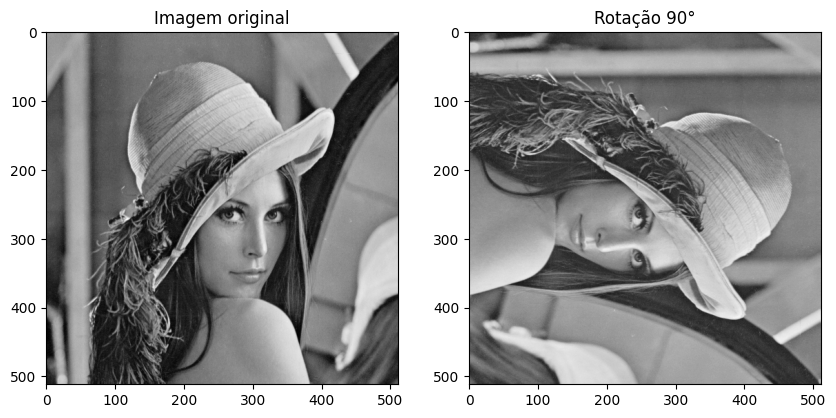

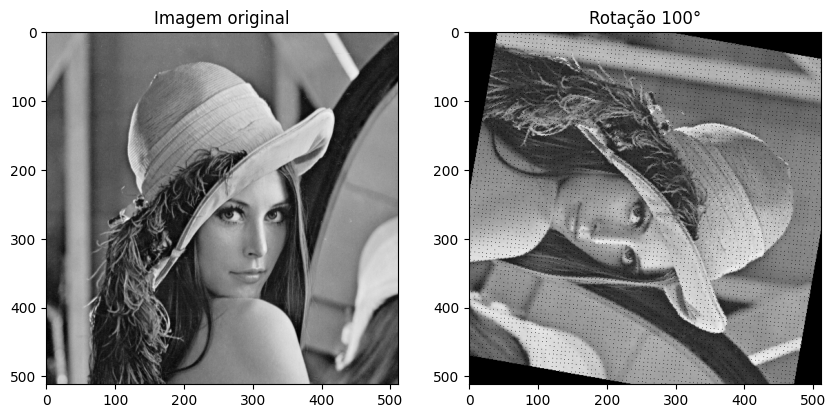

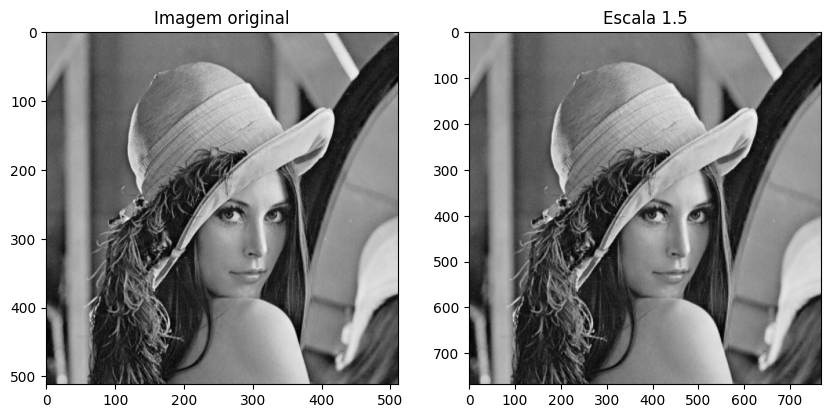

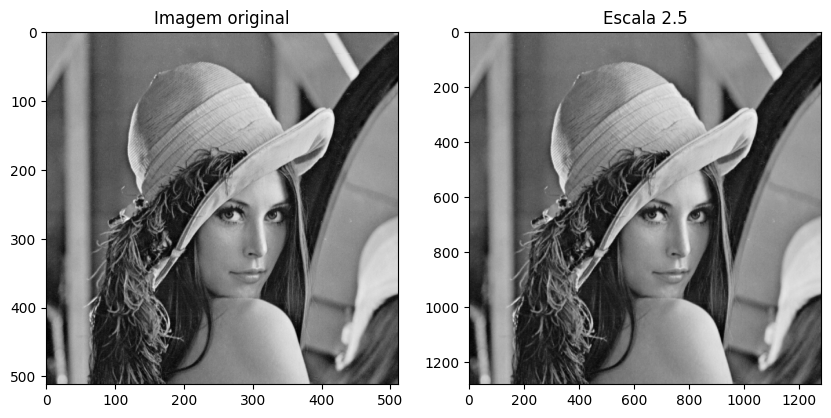

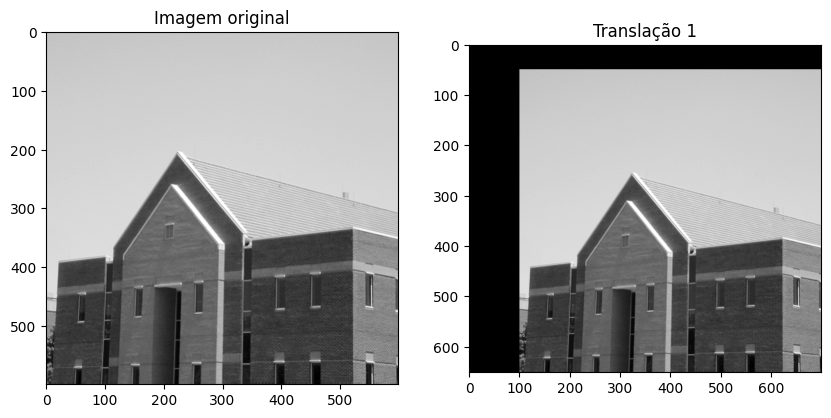

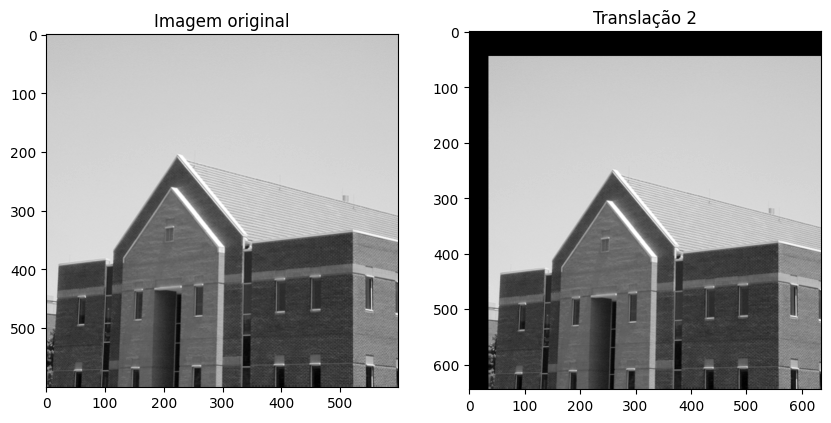

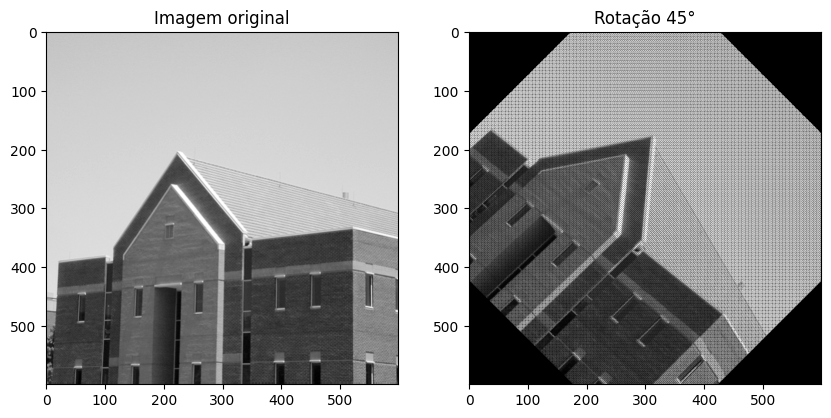

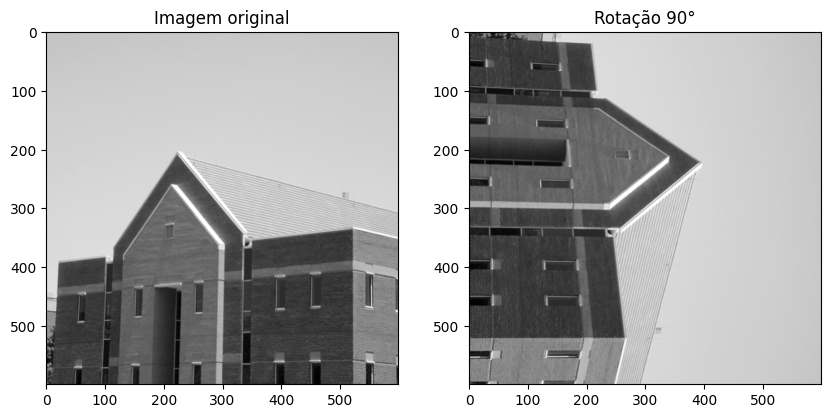

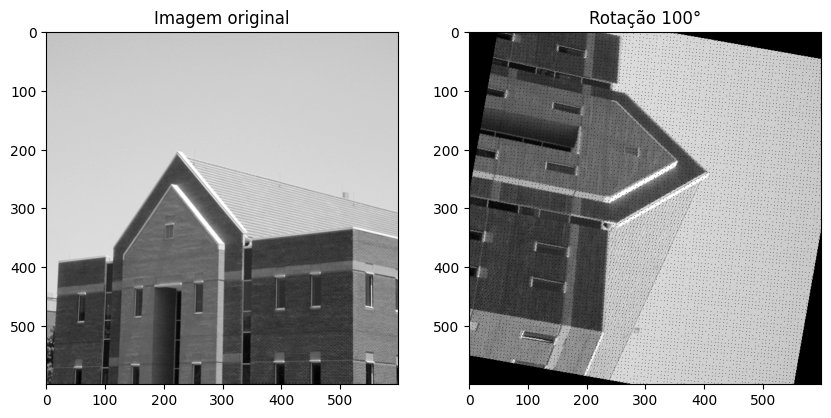

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def Translacao(img):
    img_np = np.array(img)
    desloc_x1, desloc_y1 = 100, 50
    desloc_x2, desloc_y2 = 35, 45

    new_shape1 = (img_np.shape[0] + desloc_y1, img_np.shape[1] + desloc_x1)
    new_shape2 = (img_np.shape[0] + desloc_y2, img_np.shape[1] + desloc_x2)

    t_img = np.zeros(new_shape1, dtype=img_np.dtype)
    t_img1 = np.zeros(new_shape2, dtype=img_np.dtype)

    t_img[desloc_y1:, desloc_x1:] = img_np
    t_img1[desloc_y2:, desloc_x2:] = img_np
    Plota(img_np, t_img, "Translação 1")
    Plota(img_np, t_img1, "Translação 2")

def Escala(img):
    img_np = np.array(img)
    img_aumentada = np.zeros((int(img_np.shape[0] * 1.5), int(img_np.shape[1] * 1.5)), dtype=img_np.dtype)
    for i in range(img_aumentada.shape[0]):
        for j in range(img_aumentada.shape[1]):
            img_aumentada[i, j] = img_np[int(i / 1.5), int(j / 1.5)]
    img_aumentada1 = np.zeros((int(img_np.shape[0] * 2.5), int(img_np.shape[1] * 2.5)), dtype=img_np.dtype)
    for i in range(img_aumentada1.shape[0]):
        for j in range(img_aumentada1.shape[1]):
            img_aumentada1[i, j] = img_np[int(i / 2.5), int(j / 2.5)]

    Plota(img_np, img_aumentada, "Escala 1.5")
    Plota(img_np, img_aumentada1, "Escala 2.5")

def Rotacao(img):
    img_np = np.array(img)
    h, w = img_np.shape
    center = (h // 2, w // 2)

    rotate_45 = np.zeros_like(img_np)
    for i in range(h):
        for j in range(w):
            new_x = int((j - center[1]) * np.cos(np.radians(45)) - (i - center[0]) * np.sin(np.radians(45)) + center[1])
            new_y = int((j - center[1]) * np.sin(np.radians(45)) + (i - center[0]) * np.cos(np.radians(45)) + center[0])
            if 0 <= new_x < w and 0 <= new_y < h:
                rotate_45[new_y, new_x] = img_np[i, j]

    rotate_90 = np.zeros_like(img_np)
    for i in range(h):
        for j in range(w):
            new_x = center[1] - (i - center[0])
            new_y = center[0] + (j - center[1])
            if 0 <= new_x < w and 0 <= new_y < h:
                rotate_90[new_y, new_x] = img_np[i, j]

    rotate_100 = np.zeros_like(img_np)
    for i in range(h):
        for j in range(w):
            new_x = int((j - center[1]) * np.cos(np.radians(100)) - (i - center[0]) * np.sin(np.radians(100)) + center[1])
            new_y = int((j - center[1]) * np.sin(np.radians(100)) + (i - center[0]) * np.cos(np.radians(100)) + center[0])
            if 0 <= new_x < w and 0 <= new_y < h:
                rotate_100[new_y, new_x] = img_np[i, j]

    Plota(img_np, rotate_45, "Rotação 45°")
    Plota(img_np, rotate_90, "Rotação 90°")
    Plota(img_np, rotate_100, "Rotação 100°")

def Plota(img, imgNew, titulo):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title("Imagem original")
    ax[1].imshow(imgNew, cmap='gray')
    ax[1].set_title(titulo)
    plt.show()

def main():
  im1 = Image.open('/content/cameraman.tif')
  im2 = Image.open('/content/house.tif')
  im3 = Image.open('/content/lena_gray_512.tif')
  Translacao(im3)
  Rotacao(im3)
  Escala(im3)
  Translacao(im2)
  Rotacao(im2)
  Escala(im2)
  Translacao(im1)
  Rotacao(im1)
  Escala(im1)

if __name__ == "__main__":
    main()
